# Analyse en composantes principales
## 1. Importation des données active.

Dans un premier temps, nous importons le tableau des individus et variables actifs pour la construction des axes factoriels

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
X = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=0,header=0,index_col=0)

In [17]:
#dimension
print(X.shape) # (18, 6)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage des données
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9295       1769     83   440   165   1095    165
Op

## 2. Préparation des données
Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée avec PCA.
Nous utilisons la classe StandardScaler pour ce faire. 

In [18]:
#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

## 3. ACP avec PCA()

In [19]:
#instanciation
acp = PCA(svd_solver='full')

In [20]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


Le paramètre (svd_solver = ‘full’) indique l’algorithme utilisé pour la décomposition en
valeurs singulières. 

Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par
défaut pour l’appréhension des bases de taille réduite. 

D’autres approches sont disponibles pour le traitement des grands ensembles de données. 

Le nombre de composantes (K) n’étant pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = p)

In [21]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_) 

6


In [22]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [23]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La première composante accapare 73.68% de l’information disponible. Il y a un fort 'effet
taille’ dans nos données. Nous disposons de 87.94% avec les deux premiers facteurs. Les suivants semblent anecdotiques.

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être intéressant.

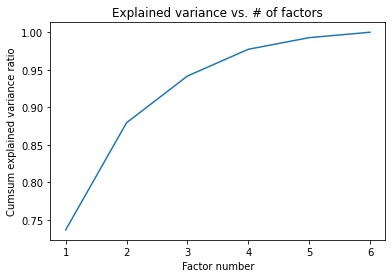

In [24]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## 4. Détermination du nombre de facteur à retenir.

Les 'cassures' dans les graphiques ci-dessus sont souvent évoquées (règle du coude) pour identifier le nombre de facteurs K* à retenir. 

La solution (K* = 2) semble s’imposer ici.

## 5. Représentation des individus. 

### 5.1 Coordonnées factorielles. 

Les coordonnées factorielles des individus ont été collectées dans la variable coord. 

Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les véhicules.

NB : Les outils graphiques calculent souvent automatiquement les échelles en fonction des
plages de valeurs. 

Ce n’est pas une bonne idée en ce qui concerne l’ACP. 

En effet, les axes n’ont pas la même importance (% de variance restituée). 

Pour ne pas fausser la perception des proximités, il est très important de veiller à ce que les échelles soient
identiques en abscisse et en ordonnée. 

Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes. 

Nous nous rendons compte directement dans notre graphique que les dispersions des individus sont nettement plus
marquées sur le premier axe, en abscisse.

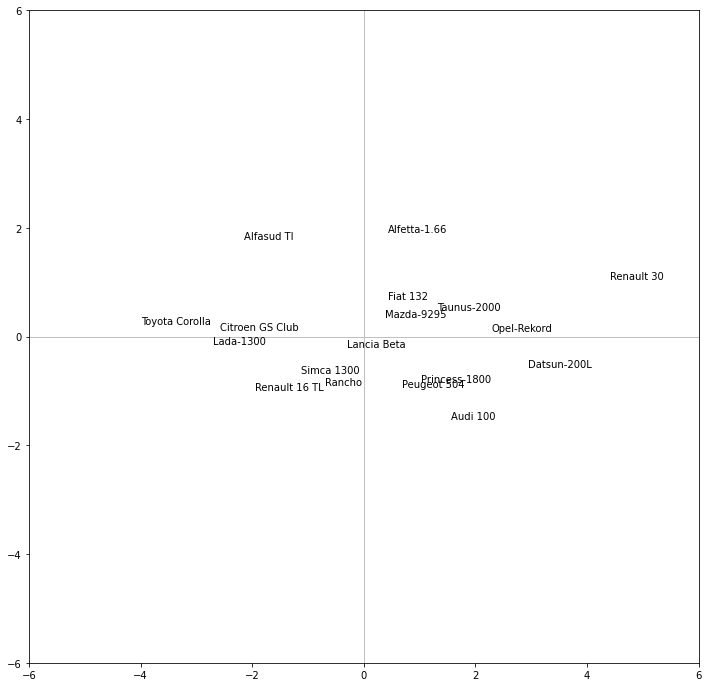

In [25]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

## 5.2 Qualité de représentation des individus. 

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

In [26]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


Concrètement, la Renault 30 et la Toyota Corolla sont les deux véhicules qui se démarquent
le plus des autres, et on les retrouve aux deux extrémités du premier axe factoriel qui porte
73.68% de l’information disponible 

In [27]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9295  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


## 5.3. Contribution des individus aux axes (CTR). 

Elles permettent de déterminer les
individus qui pèsent le plus dans la définition de chaque facteur.

## 6. Représentation des variables.

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ .components_.

In [28]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


Attention, les facteurs sont en ligne, les variables en colonne. 

Nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟𝑗𝑘) en les multipliant par la racine carrée des valeurs propres :

In [29]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l’on s’en tient spécifiquement aux deux premiers facteurs :

In [30]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V_MAX  0.754710  0.573519


Nous pouvons dessiner maintenant le cercle des corrélations

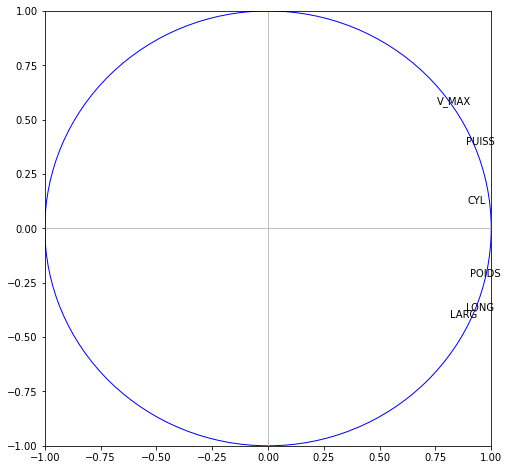

In [31]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On perçoit clairement l’effet taille sur le premier axe :

les voitures puissantes et rapides sont
aussi les plus lourdes et imposantes, la relation globale entre les variables est en réalité
déterminée par la cylindrée (CYL)

## 6.1 Qualité de représentation des variables (COS²). 

On peut calculer la qualité de
représentation des variables en montant la corrélation au carré.

In [32]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V_MAX  0.569588  0.328925


## 6.2. Contribution des variables aux axes (CTR). 

La contribution est également basée sur le
carré de la corrélation, mais relativisée par l’importance de l’axe

In [33]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
4  POIDS  0.185341  0.058892
5  V_MAX  0.128841  0.384230
